<a href="https://colab.research.google.com/github/TaNuNian/Basicpython_ESANTH/blob/main/DataScience101_MLprocess_Usecase_bank_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Process
# 1. Get Data


In [ ]:
import pandas as pd
df = pd.read_csv("/content/bank-data.csv")
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,credit
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


# 2. Clean Data and Data Preparation


In [ ]:
df.shape

(600, 12)

In [ ]:
df.describe()

,age,income,children
count,600.000000,589.000000,600.000000
mean,42.395000,27470.335195,1.011667
std,14.424947,12866.126072,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17240.600000,0.000000
50%,42.000000,24904.000000,1.000000
75%,55.250000,36166.200000,2.000000
max,67.000000,63130.100000,3.000000


In [ ]:
df.dtypes

id              object
age              int64
sex             object
region          object
income         float64
married         object
children         int64
car             object
save_act        object
current_act     object
mortgage        object
credit          object
dtype: object

In [ ]:
df.isnull().sum()

id              0
age             0
sex             0
region          0
income         11
married         0
children        0
car             0
save_act        0
current_act     0
mortgage        0
credit          0
dtype: int64

In [ ]:
df['income'] = df['income'].fillna(df['income'].mean())

In [ ]:
df.isnull().sum()

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
credit         0
dtype: int64

In [ ]:
df.dtypes

id              object
age              int64
sex             object
region          object
income         float64
married         object
children         int64
car             object
save_act        object
current_act     object
mortgage        object
credit          object
dtype: object

LabelEncoder การแปลงข้อมูลจาก object เป็น int

In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['region'] = labelencoder.fit_transform(df['region'])
df['married'] = labelencoder.fit_transform(df['married'])
df['car'] = labelencoder.fit_transform(df['car'])
df['save_act'] = labelencoder.fit_transform(df['save_act'])
df['current_act'] = labelencoder.fit_transform(df['current_act'])
df['mortgage'] = labelencoder.fit_transform(df['mortgage'])
df['credit'] = labelencoder.fit_transform(df['credit'])

In [ ]:
df.head(5)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,credit
0,ID12101,48,0,0,17546.0,0,1,0,0,0,0,1
1,ID12102,40,1,3,30085.1,1,3,1,0,1,1,0
2,ID12103,51,0,0,16575.4,1,0,1,1,1,0,0
3,ID12104,23,0,3,20375.4,1,3,0,0,1,0,0
4,ID12105,57,0,1,50576.3,1,0,0,1,0,0,0


In [ ]:
df.tail(5)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,credit
595,ID12696,61,0,0,47025.00,0,2,1,1,1,1,0
596,ID12697,30,0,0,9672.25,1,0,1,1,1,0,0
597,ID12698,31,0,3,15976.30,1,0,1,1,0,0,1
598,ID12699,29,1,0,14711.80,1,0,0,1,0,1,0
599,ID12700,38,1,3,26671.60,0,0,1,0,1,1,1


In [ ]:
df.groupby('credit')['income'].mean()

credit
0    24849.484299
1    30588.573853
Name: income, dtype: float64

In [ ]:
df.dtypes

id              object
age              int64
sex              int64
region           int64
income         float64
married          int64
children         int64
car              int64
save_act         int64
current_act      int64
mortgage         int64
credit           int64
dtype: object

Feature Selection

In [ ]:
df = df.drop(['id'],axis=1)

In [ ]:
df.columns

Index(['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'credit'],
      dtype='object')

# 3. Create Model

Decision Tree Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

x = df.drop(['credit'],axis=1)
y = df.credit


# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_y, test_y = train_test_split(x, y, train_size=0.70, shuffle=False)


# Create Decision Tree classifer object
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
decision_tree_classifier.fit(train_data,train_y)

y_predict = decision_tree_classifier.predict(test_data)
y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1])

In [ ]:
decision_tree_classifier

DecisionTreeClassifier(criterion='entropy')

# 4. Evaluation Model

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y,y_predict))

Accuracy: 0.8222222222222222


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        97
           1       0.81      0.80      0.80        83

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180



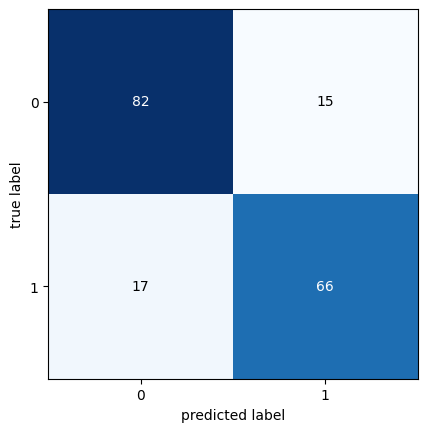

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(test_y,y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

# Others Data Preparation

การแปลงข้อมูลแบบ One-Hot Encoder สำหรับ Column Sex

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# generate binary values using get_dummies
dum_df = pd.get_dummies(df, columns=["sex"], prefix=["sex"] )
# merge with main df bridge_df on key values
dum_df

,age,region,income,married,children,car,save_act,current_act,mortgage,credit,sex_0,sex_1
0,48,0,17546.00,0,1,0,0,0,0,1,1,0
1,40,3,30085.10,1,3,1,0,1,1,0,0,1
2,51,0,16575.40,1,0,1,1,1,0,0,1,0
3,23,3,20375.40,1,3,0,0,1,0,0,1,0
4,57,1,50576.30,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,47025.00,0,2,1,1,1,1,0,1,0
596,30,0,9672.25,1,0,1,1,1,0,0,1,0
597,31,3,15976.30,1,0,1,1,0,0,1,1,0
598,29,0,14711.80,1,0,0,1,0,1,0,0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

x = df.drop(['credit'],axis=1)
y = df.credit


# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_y, test_y = train_test_split(x, y, train_size=0.70, shuffle=False)


# Create Decision Tree classifer object
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
decision_tree_classifier.fit(train_data,train_y)

y_predict = decision_tree_classifier.predict(test_data)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y,y_predict))

Accuracy: 0.8111111111111111


แปลงแบบ One-hot encoder สำหรับ column Children

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# generate binary values using get_dummies
dum_df = pd.get_dummies(df, columns=["children"], prefix=["children"] )
# merge with main df bridge_df on key values
dum_df

,age,sex,region,income,married,car,save_act,current_act,mortgage,credit,children_0,children_1,children_2,children_3
0,48,0,0,17546.00,0,0,0,0,0,1,0,1,0,0
1,40,1,3,30085.10,1,1,0,1,1,0,0,0,0,1
2,51,0,0,16575.40,1,1,1,1,0,0,1,0,0,0
3,23,0,3,20375.40,1,0,0,1,0,0,0,0,0,1
4,57,0,1,50576.30,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,1,1,1,1,0,0,0,1,0
596,30,0,0,9672.25,1,1,1,1,0,0,1,0,0,0
597,31,0,3,15976.30,1,1,1,0,0,1,1,0,0,0
598,29,1,0,14711.80,1,0,1,0,1,0,1,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

x = df.drop(['credit'],axis=1)
y = df.credit


# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_y, test_y = train_test_split(x, y, train_size=0.70, shuffle=False)


# Create Decision Tree classifer object
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
decision_tree_classifier.fit(train_data,train_y)

y_predict = decision_tree_classifier.predict(test_data)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y,y_predict))

Accuracy: 0.8055555555555556


การ rescale สำหรับค่า income โดยวิธี MinMaxScaler

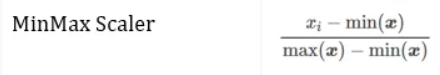

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
model=scaler.fit(df[['income']])
scaled_data=model.transform(df[['income']])
df["income_trans"] = scaled_data
df

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,credit,income_trans
0,48,0,0,17546.00,0,1,0,0,0,0,1,0.215634
1,40,1,3,30085.10,1,3,1,0,1,1,0,0.431395
2,51,0,0,16575.40,1,0,1,1,1,0,0,0.198933
3,23,0,3,20375.40,1,3,0,0,1,0,0,0.264320
4,57,0,1,50576.30,1,0,0,1,0,0,0,0.783987
...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1,1,0,0.722880
596,30,0,0,9672.25,1,0,1,1,1,0,0,0.080151
597,31,0,3,15976.30,1,0,1,1,0,0,1,0.188625
598,29,1,0,14711.80,1,0,0,1,0,1,0,0.166866


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

x = df.drop(['credit','income'],axis=1)
y = df.credit


# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_y, test_y = train_test_split(x, y, train_size=0.70, shuffle=False)


# Create Decision Tree classifer object
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
decision_tree_classifier.fit(train_data,train_y)

y_predict = decision_tree_classifier.predict(test_data)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y,y_predict))

Accuracy: 0.8055555555555556


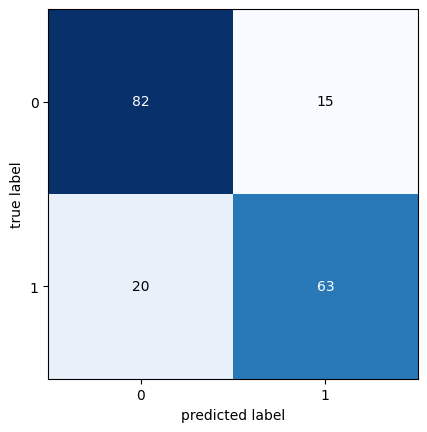

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(test_y,y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

การ rescale สำหรับค่า income โดยวิธี StandardScaler

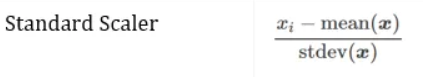

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_scaler = scaler.fit_transform(df[['income']])
df["income_strans"] = s_scaler
df

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,credit,income_trans,income_strans
0,48,0,0,17546.00,0,1,0,0,0,0,1,0.215634,-0.779185
1,40,1,3,30085.10,1,3,1,0,1,1,0,0.431395,0.205292
2,51,0,0,16575.40,1,0,1,1,1,0,0,0.198933,-0.855389
3,23,0,3,20375.40,1,3,0,0,1,0,0,0.264320,-0.557042
4,57,0,1,50576.30,1,0,0,1,0,0,0,0.783987,1.814109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1,1,0,0.722880,1.535287
596,30,0,0,9672.25,1,0,1,1,1,0,0,0.080151,-1.397373
597,31,0,3,15976.30,1,0,1,1,0,0,1,0.188625,-0.902426
598,29,1,0,14711.80,1,0,0,1,0,1,0,0.166866,-1.001705


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

x = df.drop(['credit','income'],axis=1)
y = df.credit


# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_y, test_y = train_test_split(x, y, train_size=0.70, shuffle=False)


# Create Decision Tree classifer object
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
decision_tree_classifier.fit(train_data,train_y)

y_predict = decision_tree_classifier.predict(test_data)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y,y_predict))

Accuracy: 0.8166666666666667


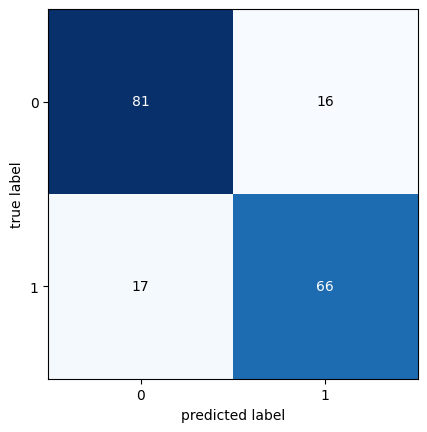

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(test_y,y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()